## This notebook is used to extend the data exploration to find clusters within the merged data.
## Primarily : AverageAgeProfile of GP, Per patient cost, Value of IMD will be put together.

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [66]:
mergedData = pd.read_csv('./UKMergedDataSelected_u2.csv', sep=',', encoding = "ISO-8859-1")

In [67]:
mergedData.columns

Index(['Unnamed: 0', 'PRACTICE', 'ITEMS  ', 'NIC        ', 'ACT COST   ',
       'QUANTITY', 'PERIOD', 'Unnamed: 0.1', 'Regional Office Name',
       'Regional Office Code', 'Area Team Name', 'Area Team Code', 'PCO Name',
       'PCO Code', 'Practice Name', 'Practice Code', 'Male 0-4', 'Female 0-4',
       'Male 5-14', 'Female 5-14', 'Male 15-24', 'Female 15-24', 'Male 25-34',
       'Female 25-34', 'Male 35-44', 'Female 35-44', 'Male 45-54',
       'Female 45-54', 'Male 55-64', 'Female 55-64', 'Male 65-74',
       'Female 65-74', 'Male 75+', 'Female 75+', 'TotalSize', 'AvgAgeProfile',
       'PerPatient_NIC', 'PerPatient_ActCost', '% aged 65+ years',
       'Diabetes: QOF prevalence (17+)', '% of Diabetes patients',
       'Hypertension: QOF prevalence (all ages)', '% of Hypertension patients',
       'Deprivation score (IMD 2015)'],
      dtype='object')

In [227]:
features = ['AvgAgeProfile', '% aged 65+ years', '% of Diabetes patients', 'Deprivation score (IMD 2015)', ]

In [228]:
DiabFilter = mergedData['% of Diabetes patients'] < 15.0
AgeFilter = mergedData['AvgAgeProfile'] < 65.0

In [233]:
sampleData = mergedData[DiabFilter & AgeFilter]

In [230]:
sampleData = sampleData[features]

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=4, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Text(0,0.5,' % of Diabetes patients')

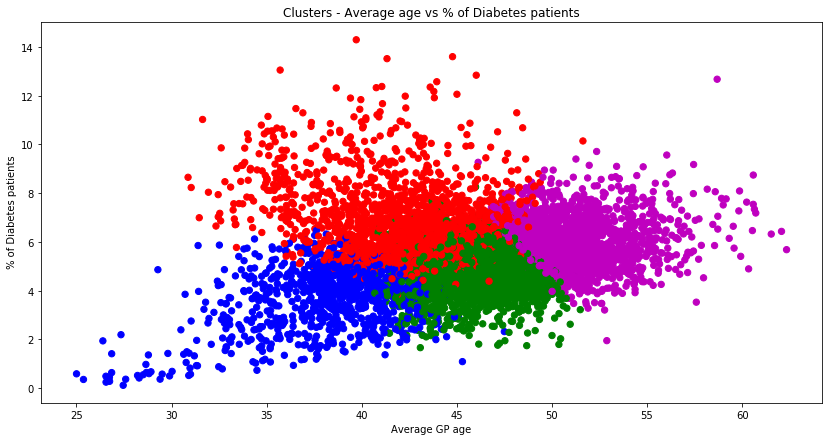

In [231]:
X = StandardScaler().fit_transform(sampleData)

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, max_iter=500,)
model = kmeans.fit(X)
print("model\n", model)

centers = model.cluster_centers_

# Plot clusters - Average age + vs % of Diabetes patients
plt.figure(figsize=(14,7))
colormap = np.array(['b', 'g', 'r', 'm', 'c', 'y', 'k', 'fuchsia', 'peachpuff', 'k', 'm'])
plt.scatter(sampleData['AvgAgeProfile'], sampleData['% of Diabetes patients'], c=colormap[model.labels_], s=40)
plt.title('Clusters - Average age vs % of Diabetes patients')
plt.xlabel("Average GP age")
plt.ylabel(" % of Diabetes patients")

In [232]:
model.labels_

array([3, 3, 1, ..., 2, 0, 3])

In [234]:
sampleData['ClusterNumber'] = model.labels_

C:\Users\Shashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
# ClusterDiabetics
sampleData.to_csv('ClusterDiabetics.csv', sep=',')

In [236]:
features = ['AvgAgeProfile', '% aged 65+ years', '% of Hypertension patients', 'Deprivation score (IMD 2015)', ]

In [237]:
mergedData['% of Hypertension patients'].describe()

count    7156.000000
mean       14.234551
std        16.161693
min         0.102976
25%        11.692963
50%        14.127116
75%        16.289748
max      1168.181818
Name: % of Hypertension patients, dtype: float64

In [246]:
sampleData = mergedData[mergedData['% of Hypertension patients'] < 25.0]

In [239]:
sampleData = sampleData[features]

In [240]:
sampleData.columns

Index(['AvgAgeProfile', '% aged 65+ years', '% of Hypertension patients',
       'Deprivation score (IMD 2015)'],
      dtype='object')

In [241]:
sampleData.shape

(7127, 4)

In [242]:
X = StandardScaler().fit_transform(sampleData)
X

array([[ 0.64504794,  0.85439768,  0.15806747,  0.46605916],
       [ 0.65336081,  0.60330749,  0.85649559,  0.51226757],
       [ 0.19074707,  0.21638943, -0.1372097 ,  0.90943452],
       ..., 
       [-0.22460117, -0.32921913,  0.88800001,  0.69707118],
       [-1.54911788, -1.29892871, -1.60699294,  0.49439221],
       [ 0.83859916,  1.14722555,  1.85331444, -0.70255394]])

In [243]:
kmeans = KMeans(n_clusters=3, init='k-means++')
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [244]:
centers = model.cluster_centers_
centers

array([[-1.24202081, -1.21342443, -1.04284648,  0.90416892],
       [ 1.08760389,  1.13178688,  0.89987151, -0.65867772],
       [ 0.00996648, -0.03812879,  0.01757908, -0.09927409]])

Text(0,0.5,' % of Hypertension patients')

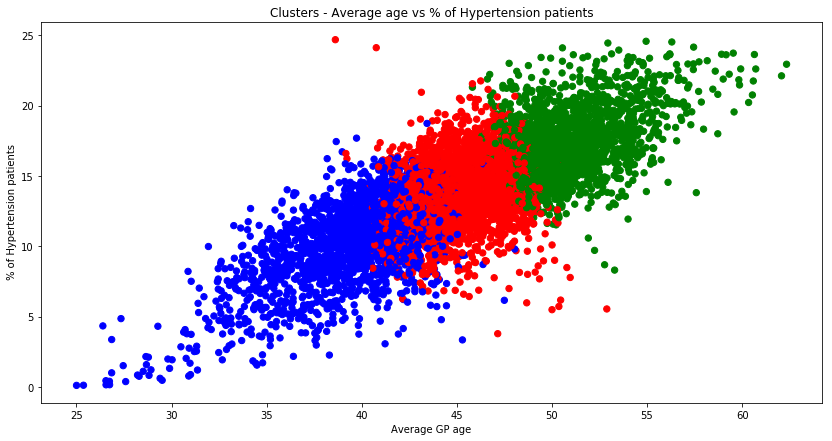

In [245]:
# Plot clusters - % 65years + vs diabetes
plt.figure(figsize=(14,7))
colormap = np.array(['b', 'g', 'r', 'm', 'c', 'y', 'k', 'w', 'y', 'k', 'w'])
plt.scatter(sampleData['AvgAgeProfile'], sampleData['% of Hypertension patients'], c=colormap[model.labels_], s=40)
plt.title('Clusters - Average age vs % of Hypertension patients')
plt.xlabel("Average GP age")
plt.ylabel(" % of Hypertension patients")

In [247]:
sampleData['ClusterNumber'] = model.labels_

C:\Users\Shashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [248]:
# Cluster Hypertension
sampleData.to_csv('ClusterHypertension.csv', sep=',')

Text(0,0.5,' % of Hypertension patients')

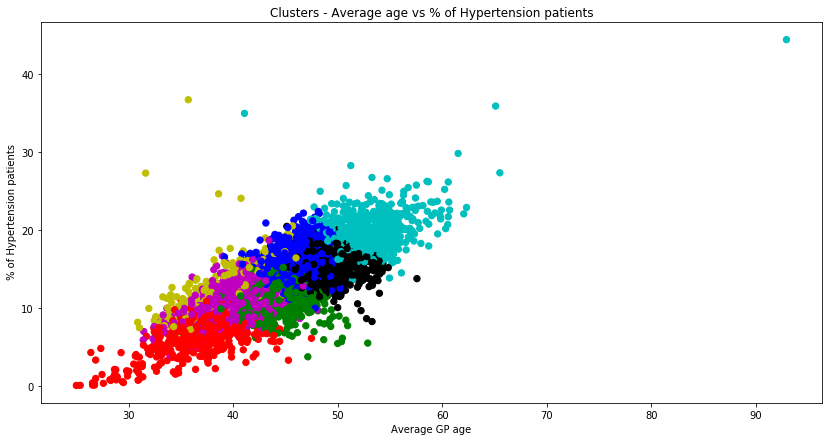

In [104]:
# Plot clusters - % 65years + vs diabetes
plt.figure(figsize=(14,7))
colormap = np.array(['b', 'g', 'r', 'm', 'c', 'y', 'k', 'w'])
plt.scatter(sampleData['AvgAgeProfile'], sampleData['% of Hypertension patients'],  c=colormap[model.labels_], s=40)
plt.title('Clusters - Average age vs % of Hypertension patients')
plt.xlabel("Average GP age")
plt.ylabel(" % of Hypertension patients")

In [83]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0,0.5,'Diabetes: QOF prevalence (17+)')

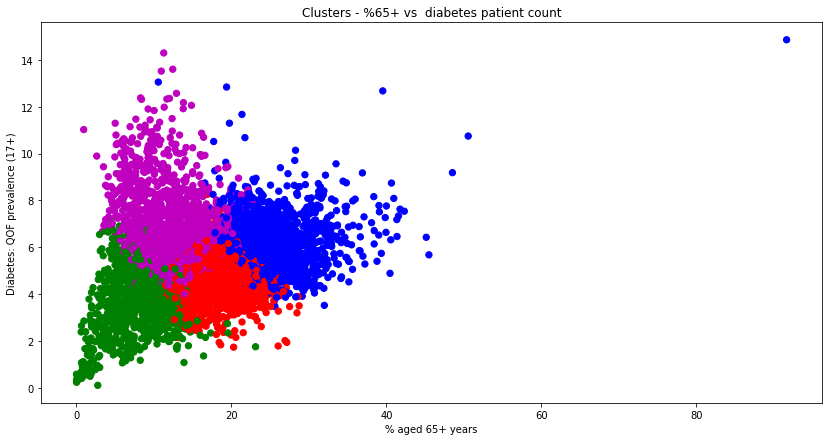

In [84]:
# Plot clusters - % aged 65+ years vs diabetes
plt.figure(figsize=(14,7))
colormap = np.array(['b', 'g', 'r', 'm', 'c', 'y', 'k', 'w'])
plt.scatter(sampleData['% aged 65+ years'], sampleData['% of Diabetes patients'], c=colormap[model.labels_], s=40)
plt.title('Clusters - %65+ vs  diabetes patient count')
plt.xlabel("% aged 65+ years")
plt.ylabel("Diabetes: QOF prevalence (17+)")

Text(0.5,1,'Clusters - Diabetes patient count vs IMD')

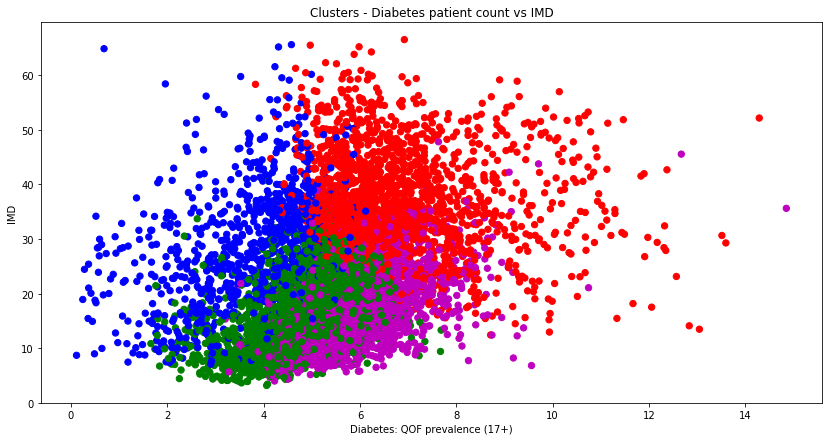

In [62]:
# Plot clusters - avg. age vs diabetes
plt.figure(figsize=(14,7))
colormap = np.array(['b', 'g', 'r', 'm', 'c', 'y', 'k', 'w'])
plt.scatter(sampleData['% of Diabetes '], sampleData['Deprivation score (IMD 2015)'], c=colormap[model.labels_], s=40)
plt.ylabel("IMD")
plt.xlabel("Diabetes: QOF prevalence (17+)")
plt.title('Clusters - Diabetes patient count vs IMD')

Text(0,0.5,'AvgAgeProfile')

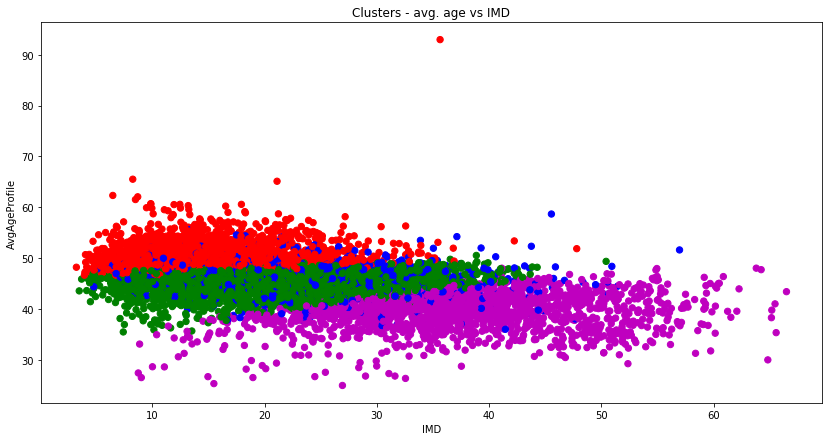

In [172]:
# Plot clusters - avg. age vs IMD
plt.figure(figsize=(14,7))
colormap = np.array(['b', 'g', 'r', 'm', 'c', 'y', 'k', 'w'])
plt.scatter(sampleData['Deprivation score (IMD 2015)'], sampleData['AvgAgeProfile'], c=colormap[model.labels_], s=40)
plt.title('Clusters - avg. age vs IMD')
plt.xlabel("IMD")
plt.ylabel("AvgAgeProfile")

Text(0,0.5,'% aged 65+')

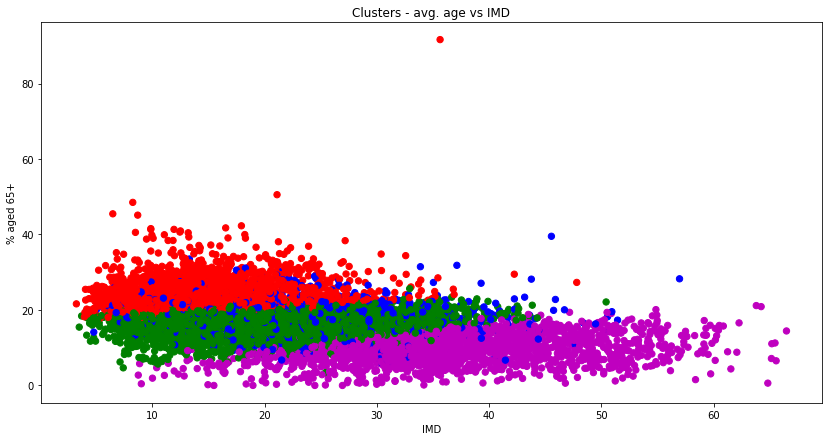

In [173]:
# Plot clusters - avg. age vs IMD
plt.figure(figsize=(14,7))
colormap = np.array(['b', 'g', 'r', 'm', 'c', 'y', 'k', 'w'])
plt.scatter(sampleData['Deprivation score (IMD 2015)'], sampleData['% aged 65+ years'], c=colormap[model.labels_], s=40)
plt.title('Clusters - avg. age vs IMD')
plt.xlabel("IMD")
plt.ylabel("% aged 65+")

Text(0.5,1,'Clusters - avg. age vs %65+')

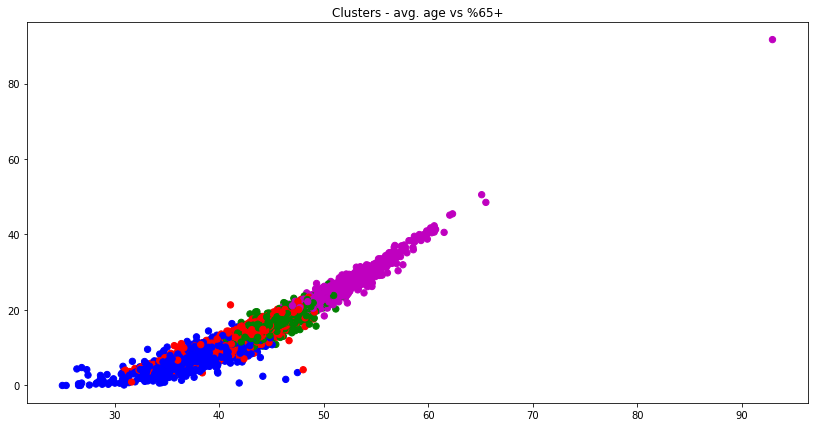

In [63]:
# Plot clusters - avg. age vs %65+
plt.figure(figsize=(14,7))
colormap = np.array(['b', 'g', 'r', 'm', 'c', 'y', 'k', 'w'])
plt.scatter(sampleData['AvgAgeProfile'], sampleData['% aged 65+ years'], c=colormap[model.labels_], s=40)
plt.title('Clusters - avg. age vs %65+')

In [156]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [157]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [158]:
P = pd_centers(features, centers)
P

,AvgAgeProfile,% aged 65+ years,Diabetes: QOF prevalence (17+),Deprivation score (IMD 2015),prediction
0,0.201537,0.224360,1.560129,-0.059786,0
1,-0.102829,-0.185548,-0.394460,-0.231123,1
2,1.102240,1.134075,-0.159387,-0.764471,2
3,-1.188647,-1.132701,-0.339805,1.156690,3


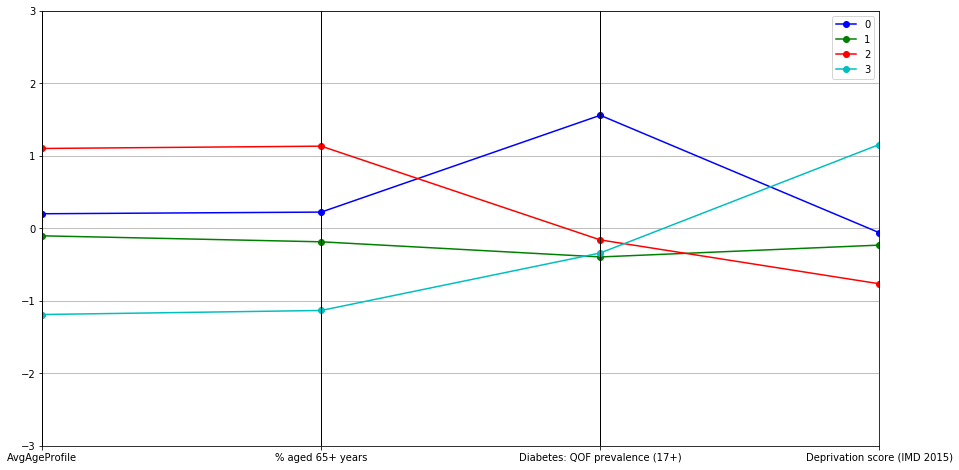

In [159]:
parallel_plot(P[P['AvgAgeProfile'] != 0])

# Principal component analysis

In [160]:
# referred resource : https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(sampleData)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [161]:
 PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [162]:
existing_2d = pca.transform(sampleData)

In [163]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = sampleData.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
0,-167.673246,1.359590
1,765.307326,5.988118
2,57.291381,9.078930
3,0.376493,-12.511041
4,428.288278,8.482593


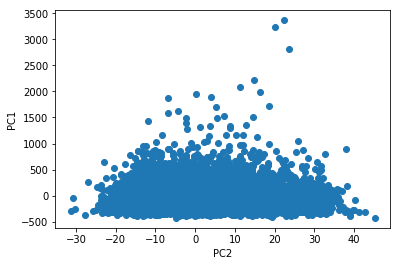

In [164]:
x = existing_df_2d['PC2'] #np.arange(0, UKMergedData['PerPatient_ActCost'].count(), 1.0)
y = existing_df_2d['PC1']
plt.scatter(x, y)
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.show()